# Kernels

In [1]:
from functools import partial

import numpy as np
from scipy import signal
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 201, 1)
u_0 = np.random.rand(len(x))/100

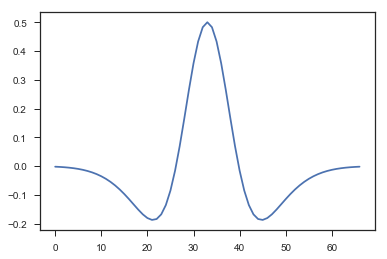

In [3]:
kernel = signal.gaussian(len(u_0)/3, 5) - signal.gaussian(len(u_0)/3, 10)/2
plt.plot(kernel)
plt.show()

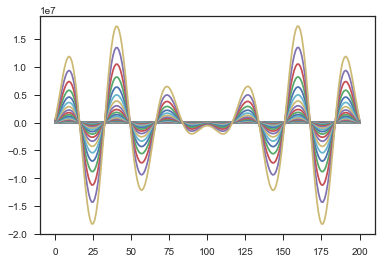

In [4]:
u = 10 + np.random.rand(len(x))/100
plt.plot(u_0)
for _ in range(70):
    u += (np.convolve(u, kernel, mode='same') - 0*u)/20
    plt.plot(u)
plt.show()

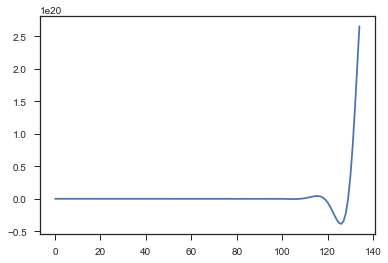

In [5]:
quot, remainder = signal.deconvolve(u, kernel)
plt.plot(quot)
plt.show()

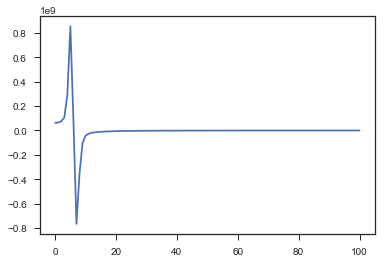

In [6]:
plt.plot(np.fft.rfft(u))
plt.show()

In [7]:
plt.plot(np.fft.rfft(np.fft.rfft(u)))
plt.show()

TypeError: 1st argument must be a real sequence 1

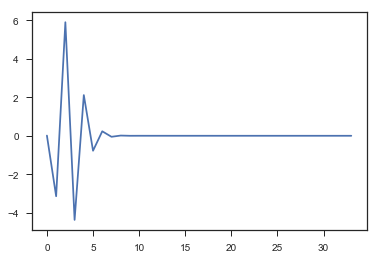

In [8]:
plt.plot(np.fft.rfft(kernel))
plt.show()

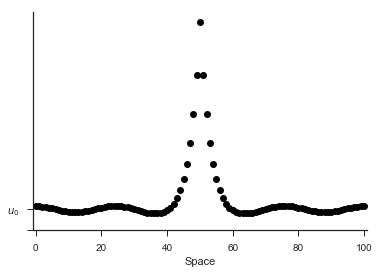

In [9]:
def ficks_law(u):
    """Finite difference scheme for Fick's law"""
    lapl = np.empty(len(u))
    lapl[0] = u[-1] - 2*u[0] + u[1]
    lapl[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
    lapl[-1] = u[-2] - 2*u[-1] + u[0]
    return lapl


def turing_w_peak(_, uv):
    assert (uv > 0).all()
    u = uv[:101]
    v = uv[101:]

    dudt = 0.5*(u - offset) + 0.6*(v - offset) - (u - offset)**3 + 2*ficks_law(u)
    dvdt = -1.9*(u - offset) - 2*(v - offset) + 25*ficks_law(v)
    dudt[50] = 0
    dvdt[50] = 0
    return np.append(dudt, dvdt)


offset = 1
x = np.arange(0, 101, 1)
uv_0 = offset + np.random.rand(len(x)*2)/10
uv_0[50] = 10*offset
uv_0[151] = 10*offset
uv = solve_ivp(turing_w_peak, [0, 1e3], uv_0, 'BDF')
plt.plot(x, uv.y[:, -1][101:], 'ko')
plt.xlabel('Space')
plt.xlim([-1, 101])
plt.yticks([0, offset], ['', '$u_0$'])
sns.despine()
plt.show()

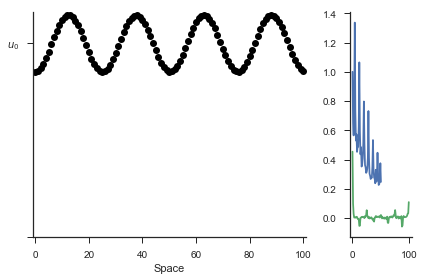

In [10]:
offset = 1

def turing(coupling, _, uv):
    assert (uv > 0).all()
    u = uv[:101]
    v = uv[101:]

    dudt = 0.5*(u - offset) + 0.6*(v - offset) - (u - offset)**3 + 2*coupling(u)
    dvdt = -1.9*(u - offset) - 2*(v - offset) + 25*coupling(v)
    return np.append(dudt, dvdt)


uv_0 = offset + np.random.rand(len(x)*2)/100
uv = solve_ivp(partial(turing, ficks_law), [0, 1e3], uv_0, 'BDF')

u_0 = uv_0[:101]
u = uv.y[:, -1][101:]
ft_k = np.fft.rfft(u)/np.fft.rfft(u_0)
ft_k = ft_k**(1/20)

plt.subplot2grid(shape=(1, 4), loc=(0, 0), colspan=3)
plt.plot(x, uv.y[:, -1][101:], 'ko')
plt.xlabel('Space')
plt.xlim([-1, 101])
plt.yticks([0, offset], ['', '$u_0$'])

plt.subplot2grid(shape=(1, 4), loc=(0, 3))
plt.plot(ft_k)
plt.plot(np.fft.irfft(ft_k))

sns.despine()
plt.tight_layout()
plt.show()